# Final Project

## Understand the dataset
### from https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

In [1]:
# Load data
# https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data
import pandas as pd
airbnb = pd.read_csv('AB_NYC_2019.csv')
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [2]:
airbnb.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


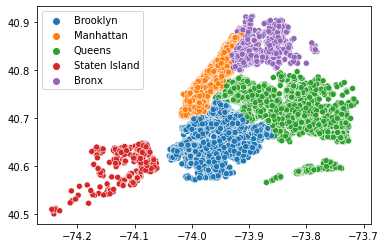

In [3]:
# Create a graph using longitude and latitude to see how the places are distributed depending on neighborhood group (5 boroughs)

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(
    x=airbnb['longitude'].values,
    y=airbnb['latitude'].values,
    hue=airbnb['neighbourhood_group'].values,
)
plt.show()

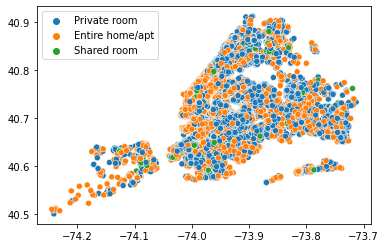

In [4]:
#Create a graph using longitude and latitude to see how the room types are distributed.

sns.scatterplot(
    x=airbnb['longitude'].values,
    y=airbnb['latitude'].values,
    hue=airbnb['room_type'].values,
)
plt.show()

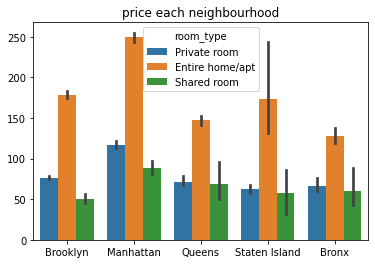

In [5]:
# find the median price by room type, and 5 boroughs

sns.barplot(x=airbnb['neighbourhood_group'].values, y=airbnb['price'].values, hue=airbnb['room_type']);
plt.title('price each neighbourhood')
plt.show()

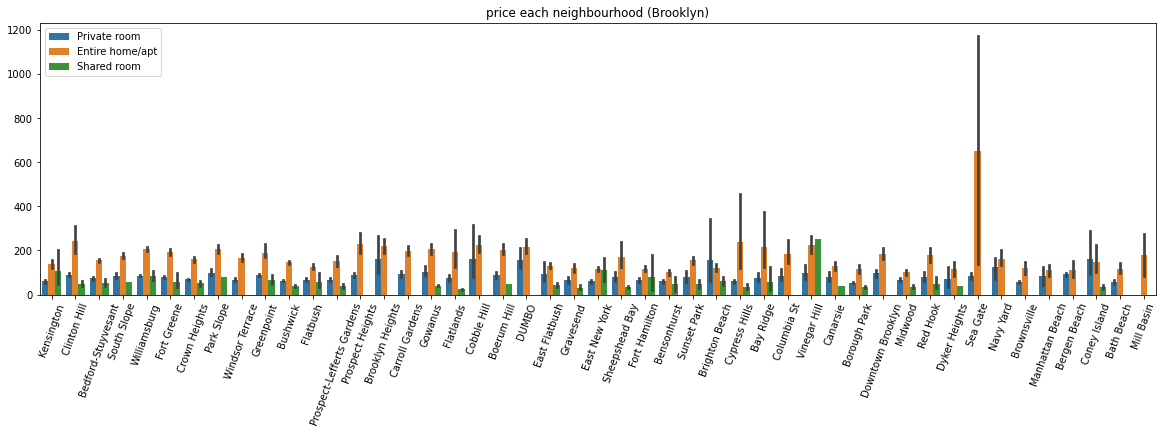

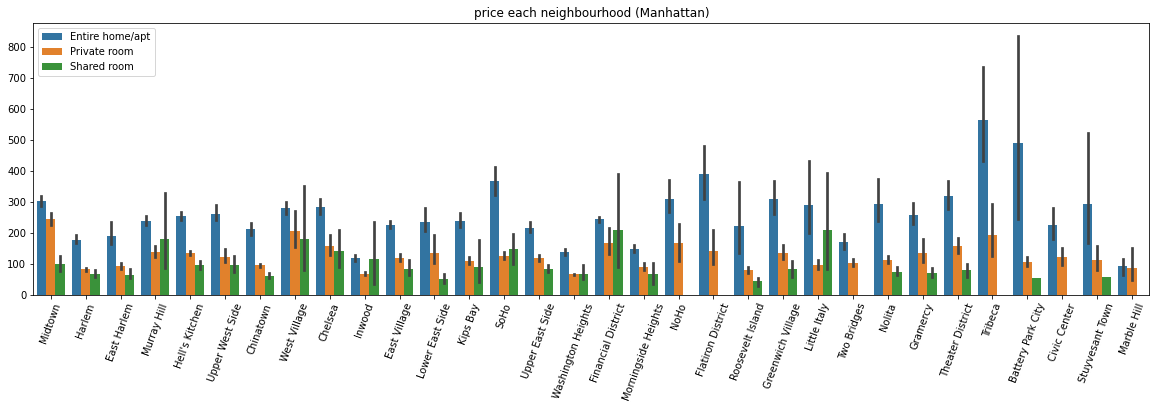

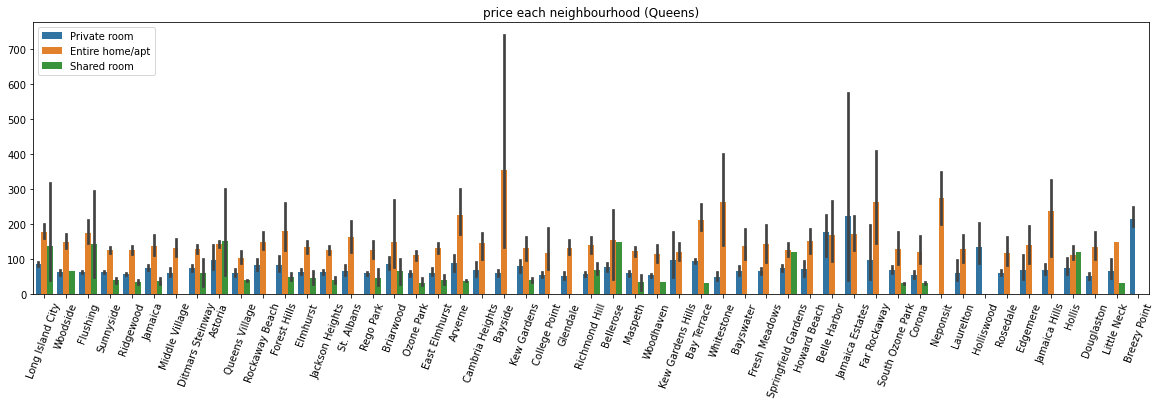

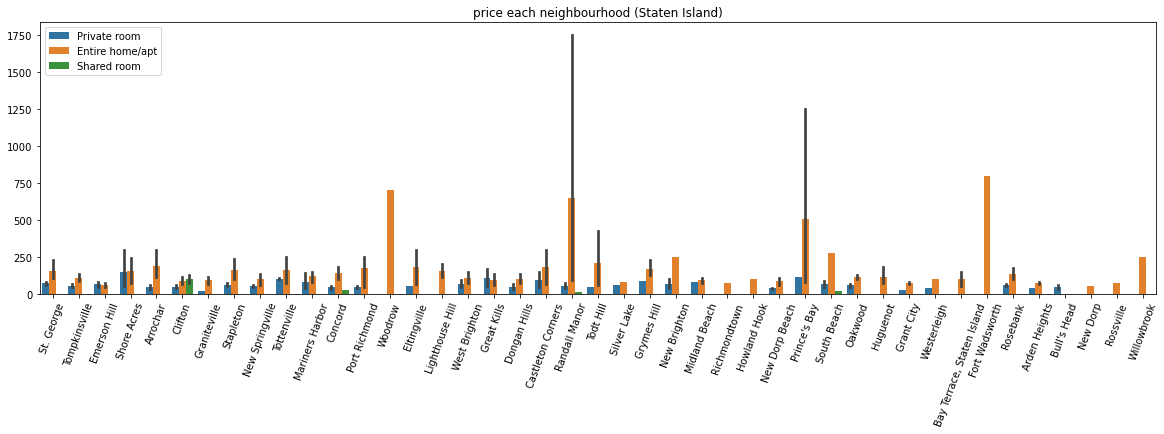

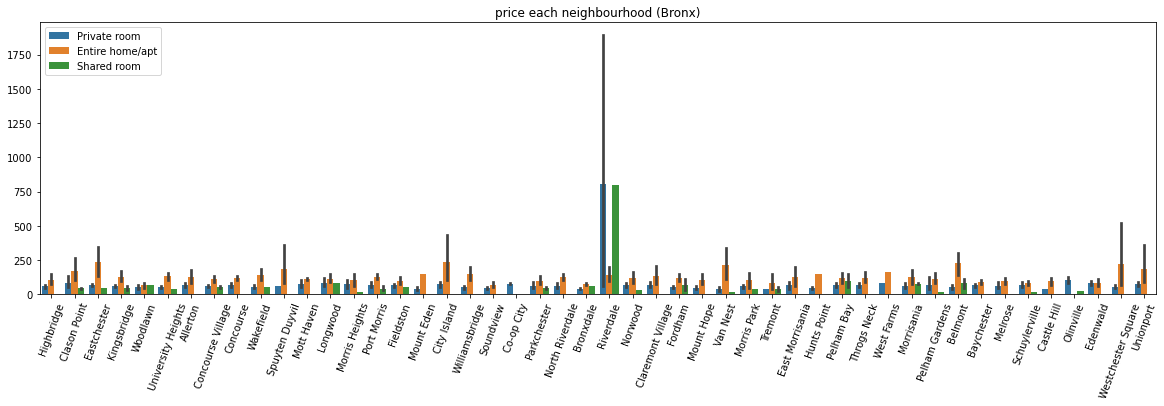

In [6]:
#show all the median prices by neighbors in each borough


for neighbourhood_group in airbnb['neighbourhood_group'].unique():
    # Filtering(selecting) neighborhoods by neighborhood groups
    airbnb_group_data = airbnb[airbnb['neighbourhood_group'] == neighbourhood_group]

    # Median prices by room types in each neighborhood 
    plt.figure(figsize = (20,5)) # increase size of the plt
    sns.barplot(
        x=airbnb_group_data['neighbourhood'].values,
        y=airbnb_group_data['price'].values,
        hue=airbnb_group_data['room_type'].values
    )
    plt.xticks(rotation=70) # tilt the plt's x names
    plt.title(f'price each neighbourhood ({neighbourhood_group})')
    plt.show()

## Create ML model to predict prices using Logistic regression

In [10]:
# Make a copy of airbnb data ao create the data that contains only training data
airbnb_training = airbnb.copy()
airbnb_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [11]:
## eliminate the columns don't neeed for ML model training 

airbnb_training.drop(
    [
        'name',
        'id',
        'host_name',
        'neighbourhood_group',
        'last_review',
        'host_id',
        'latitude',
        'longitude',
        'number_of_reviews',
        'reviews_per_month',
    ], axis=1, inplace=True)
airbnb_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   neighbourhood                   48895 non-null  object
 1   room_type                       48895 non-null  object
 2   price                           48895 non-null  int64 
 3   minimum_nights                  48895 non-null  int64 
 4   calculated_host_listings_count  48895 non-null  int64 
 5   availability_365                48895 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.2+ MB


In [12]:
# Process the data - re-lable the text data
from sklearn.preprocessing import LabelEncoder

enc_room_type = LabelEncoder()
enc_room_type.fit(airbnb_training['room_type'])
airbnb_training['room_type'] = enc_room_type.transform(airbnb_training['room_type'])

enc_neighbourhood = LabelEncoder()
enc_neighbourhood.fit(airbnb['neighbourhood'])
airbnb_training['neighbourhood'] = enc_neighbourhood.transform(airbnb_training['neighbourhood'])

airbnb_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   neighbourhood                   48895 non-null  int64
 1   room_type                       48895 non-null  int64
 2   price                           48895 non-null  int64
 3   minimum_nights                  48895 non-null  int64
 4   calculated_host_listings_count  48895 non-null  int64
 5   availability_365                48895 non-null  int64
dtypes: int64(6)
memory usage: 2.2 MB


In [13]:
airbnb_training.head(5)

,neighbourhood,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,108,1,149,1,6,365
1,127,0,225,1,2,355
2,94,1,150,3,1,365
3,41,0,89,1,1,194
4,61,0,80,10,1,0


In [14]:
# create X, Y for ML training 
x_columns = ['neighbourhood', 'room_type', 'minimum_nights', 'calculated_host_listings_count', 'availability_365']
x = airbnb_training[x_columns].values
y = airbnb_training['price'].values

x, y

(array([[108,   1,   1,   6, 365],
        [127,   0,   1,   2, 355],
        [ 94,   1,   3,   1, 365],
        ...,
        [ 94,   0,  10,   1,  27],
        [ 95,   2,   1,   6,   2],
        [ 95,   1,   7,   1,  23]]),
 array([149, 225, 150, ..., 115,  55,  90]))

In [15]:
 # seperate the training data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

x_train.shape, x_test.shape

((39116, 5), (9779, 5))

In [16]:
# Train the ML model
import time

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Use 4 different Logistic regression to train model
model_list = {
    'linear': LinearRegression(),
    'lasso' : Lasso(),
    'dt'    : DecisionTreeRegressor(),
    'rf'    : RandomForestRegressor(),
}

# train each model
for model_name, model in model_list.items():
    start_time = time.time()
    print(f'fit {model_name}')
    model.fit(x_train, y_train) # train model
    print(f'fitting time : {(time.time() - start_time):.3f} seconds') # print learning time

fit linear
fitting time : 0.004 seconds
fit lasso
fitting time : 0.004 seconds
fit dt
fitting time : 0.078 seconds
fit rf
fitting time : 4.973 seconds


In [17]:
# Trained model performance evaluation
# Calculate MSE(Mean Squared Error), and with the lowest value results are the most accurate/Best one. 
from sklearn.metrics import mean_squared_error

best_model = (None, None) # Best accurate name of the model and model
best_mse = None # Best accurate model's MSE value

for model_name, model in model_list.items():
    y_pred = model.predict(x_test)    # Use model to prerict the price 
    mse = mean_squared_error(y_pred, y_test) # calculate MSE 
    print(f'{model_name:<6} : {mse:,.3f}') # Print name of the model and MSE

    # Check the best model
    if best_mse is None or mse < best_mse:
        best_model = (model_name, model)
        best_mse = mse

print(f'best model : {best_model[0]}')

linear : 48,409.598
lasso  : 48,404.735
dt     : 64,194.785
rf     : 43,270.882
best model : rf


In [18]:
# print neighborhood
for v in range(len(airbnb['neighbourhood'].unique())):
    print(f"{v:3} : {enc_neighbourhood.inverse_transform([v])[0]}")

  0 : Allerton
  1 : Arden Heights
  2 : Arrochar
  3 : Arverne
  4 : Astoria
  5 : Bath Beach
  6 : Battery Park City
  7 : Bay Ridge
  8 : Bay Terrace
  9 : Bay Terrace, Staten Island
 10 : Baychester
 11 : Bayside
 12 : Bayswater
 13 : Bedford-Stuyvesant
 14 : Belle Harbor
 15 : Bellerose
 16 : Belmont
 17 : Bensonhurst
 18 : Bergen Beach
 19 : Boerum Hill
 20 : Borough Park
 21 : Breezy Point
 22 : Briarwood
 23 : Brighton Beach
 24 : Bronxdale
 25 : Brooklyn Heights
 26 : Brownsville
 27 : Bull's Head
 28 : Bushwick
 29 : Cambria Heights
 30 : Canarsie
 31 : Carroll Gardens
 32 : Castle Hill
 33 : Castleton Corners
 34 : Chelsea
 35 : Chinatown
 36 : City Island
 37 : Civic Center
 38 : Claremont Village
 39 : Clason Point
 40 : Clifton
 41 : Clinton Hill
 42 : Co-op City
 43 : Cobble Hill
 44 : College Point
 45 : Columbia St
 46 : Concord
 47 : Concourse
 48 : Concourse Village
 49 : Coney Island
 50 : Corona
 51 : Crown Heights
 52 : Cypress Hills
 53 : DUMBO
 54 : Ditmars Stei

In [ ]:
import numpy as np
while True:
    target = input('input neighbourhood:')
    if target == "":
        break
    target = int(target)

    try:
        sample_idx = np.where(x_test[:, 0] == target)[0][0]
    except:
        print('Not found')
        continue

    input_data = x_test[sample_idx]
    price      = y_test[sample_idx]

    print('--------------------------------------------------')
    print(f'x_test [{sample_idx}]')
    print('--------------------------------------------------')
    # 모델의 값 출력

    # 숫자 자료를 다시 문자열로 변경하는 과정
    neighbourhood       = enc_neighbourhood      .inverse_transform([input_data[0]])[0]
    room_type           = enc_room_type          .inverse_transform([input_data[1]])[0]
    print(f'neighbourhood                  : {neighbourhood}') # neighbourhood 의 문자열 값 출력
    print(f'room_type                      : {room_type}')
    print(f'minimum_nights                 : {input_data[2]}')
    print(f'calculated_host_listings_count : {input_data[3]}')
    print(f'availability_365               : {input_data[4]}')

    'neighbourhood', 'room_type', 'minimum_nights', 'calculated_host_listings_count', 'availability_365'
    
    print('--------------------------------------------------')
    print(f'price               : ${price:.3f}')

    for model_name, model in model_list.items():
        price_pred = model.predict([input_data])
        print(f'price (pred {model_name:<6}) : ${price_pred[0]:.3f}')
    print('--------------------------------------------------')

input neighbourhood: 220


--------------------------------------------------
x_test [81]
--------------------------------------------------
neighbourhood                  : Woodside
room_type                      : Entire home/apt
minimum_nights                 : 3
calculated_host_listings_count : 1
availability_365               : 0
--------------------------------------------------
price               : $100.000
price (pred linear) : $208.230
price (pred lasso ) : $206.746
price (pred dt    ) : $85.000
price (pred rf    ) : $87.950
--------------------------------------------------


input neighbourhood: 210


Not found


input neighbourhood: 30


--------------------------------------------------
x_test [338]
--------------------------------------------------
neighbourhood                  : Canarsie
room_type                      : Entire home/apt
minimum_nights                 : 3
calculated_host_listings_count : 2
availability_365               : 114
--------------------------------------------------
price               : $130.000
price (pred linear) : $194.380
price (pred lasso ) : $192.492
price (pred dt    ) : $95.000
price (pred rf    ) : $189.360
--------------------------------------------------
